# Ensemble of 3 LSTMs

- with Data point picking preprocess and Azimuth-shifted model

---

**ABSTRACT**

The [*IceCube - Neutrinos in Deep Ice*](https://www.kaggle.com/competitions/icecube-neutrinos-in-deep-ice/overview) is a competition to predict the neutrino's incidence direction. The competition hosts provided their simulated data of neutrinos (with some background muons) with true incidence angle, azimuth and zenith. As many participates already observed, a [linear fitting](https://www.kaggle.com/code/shlomoron/icecube-eda-pca-baseline-cv-1-28-lb-1-274) could not get enough score. Muon contaminated events, neutrinos passing detector edge, or curved secondary particles are easily get confused in linear fitting method. And there must be more complicated types of events.

To handle that many types of events, the LSTM architecture was tried. As the host allowed to [submit with pretrained model](https://www.kaggle.com/competitions/icecube-neutrinos-in-deep-ice/discussion/379463), I have splited my code into few notebooks.

1. Data Preprocessing: [LSTM Preprocessing Point Picker](https://www.kaggle.com/code/seungmoklee/lstm-preprocessing-point-picker)
  - Preprocessed Dataset: [IceCubeData](https://www.kaggle.com/datasets/seungmoklee/icecubedata)
2. LSTM Training
  - Initial Training: [LSTM w/ GPU w/ npz](https://www.kaggle.com/code/seungmoklee/lstm-w-gpu-w-npz)
  - Initial Training with Azimuth Angle Shifted Label: [LSTM AzShift w/ GPU w/ npz](https://www.kaggle.com/code/seungmoklee/lstm-azshift-w-gpu-w-npz)
  - Additional Training: [cont' LSTM w/ GPU w/ npz](https://www.kaggle.com/code/seungmoklee/cont-lstm-w-gpu-w-npz)
  - Additional Training with Azimuth Angle Shifted Label: [cont' AzShift LSTM w/ GPU w/ npz](https://www.kaggle.com/code/seungmoklee/cont-azshift-lstm-w-gpu-w-npz)
  - Trained models can be found in this dataset: [IceCubeModels](https://www.kaggle.com/datasets/seungmoklee/icecubemodels)
3. Ensembling models: [LSTM Ensemble - 2 Structure and 2 Phase](https://www.kaggle.com/code/seungmoklee/lstm-ensemble-2-structure-and-2-phase)
4. Submit: *This one you are reading right now!*

---

*You may have to adjust some hyperparameters to reproduce my score. I've written all the details as far as I can. Please leave comment if you are missing anything, including notebooks, datasets, hyperparameters, settings and explanations. I'd reply.*

---

## 1. Data Preprocessing

- Notebook link: [LSTM Preprocessing Point Picker](https://www.kaggle.com/code/seungmoklee/lstm-preprocessing-point-picker)
- Dataset link: [IceCubeData](https://www.kaggle.com/datasets/seungmoklee/icecubedata)

I decided to use maximaly 128 data points for each event.
Each data points contain its time (relative to the start of each event), charge, auxiliary, position, position resolution (roughly estimated) and rank (to be explained below).
I assigned the resolution to be the gap of the detector.
You can find the relavant figure also in this notebook.

As some events had too much number of data points, I assigned the rank for each data points considering its importance.
The non-auxiliary pulse with highest charge would be the most important one.
From that point, I defined the `valid time window`.
As neutrinos travel with speed of light, it must take less than 6200 ns to transverse the detector.
So the pulses further than 6200 ns may not be in our interest.
From this intuition, I took non-aux pulses within that `valid time window` first, taking from stronger (high charge) to weaker pulses.
The following groups were 2. non-aux pulses out of the `valid time window`, 3. aux pulses in the `valid time window` and 4. aux pulses out of the `valid time window`.
If the event had pulses less than 128, zero padding was applied.

I've processed many batches and uploaded them into the dataset linked above.
I used batches from 400 to 419 for training, and from 101 to 105 for validation and ensemble optimization.

Multiprocessing technique made the code faster about 3 times.
I learned it from this [notebook](https://www.kaggle.com/code/shlomoron/icecube-eda-pca-baseline-cv-1-28-lb-1-274)
The notebook also contained so much intuitions for starting the competetion.
Thanks [greySnow](https://www.kaggle.com/shlomoron).

---

## 2. LSTM Training

- Notebook links
  - [LSTM w/ GPU w/ npz](https://www.kaggle.com/code/seungmoklee/lstm-w-gpu-w-npz)
  - [LSTM AzShift w/ GPU w/ npz](https://www.kaggle.com/code/seungmoklee/lstm-azshift-w-gpu-w-npz)
  - [cont' LSTM w/ GPU w/ npz](https://www.kaggle.com/code/seungmoklee/cont-lstm-w-gpu-w-npz)
  - [cont' AzShift LSTM w/ GPU w/ npz](https://www.kaggle.com/code/seungmoklee/cont-azshift-lstm-w-gpu-w-npz)
- Dataset link: [IceCubeModels](https://www.kaggle.com/datasets/seungmoklee/icecubemodels)

Training angle directly is quite ambiguous, as it is cyclic variable.
Despite training by regression, I trained my models using classification.
The idea was adopted from [this paper](http://lps3.doi.org.libproxy.snu.ac.kr/10.1785/0220180311).
One-hot encoding labels were gaven to each 2D-angles with fine binning, and trained LSTM models.
Two LSTM models were trained, one had 1 LSTM layer with 128 nodes followed by 1 Dense layer with 64 nodes.
Some additional training was conducted with other data batches, with lower learning rate.
The trained models can be found in the dataset above.
```
トレーニング角度は循環変数であるため、直接的には非常にあいまいです。
回帰によるトレーニングにもかかわらず、分類を使用してモデルをトレーニングしました。
このアイデアは[この論文](http://lps3.doi.org.libproxy.snu.ac.kr/10.1785/0220180311)から採用されました。
細かいビニングと訓練された LSTM モデルを使用して、各 2D 角度にワンホット エンコーディング ラベルが付与されました。
2 つの LSTM モデルがトレーニングされ、1 つには 128 ノードの 1 つの LSTM レイヤーがあり、その後に 64 ノードの 1 つの Dense レイヤーが続きました。
より低い学習率で、他のデータバッチを使用していくつかの追加のトレーニングが行われました。
トレーニング済みのモデルは、上記のデータセットにあります。
```
---

## 3. Ensembling models

- Notebook link: [LSTM Ensemble - 2 Structure and 2 Phase](https://www.kaggle.com/code/seungmoklee/lstm-ensemble-2-structure-and-2-phase)

Ensembling various models always helps to squeeze the score.
I developed optimal combination from this notebook.

---

## 4. Submit

Finally, submition was done using this notebook!

---

# START-OF-CODE

In [1]:
model_names = [
    "PointPicker_mpc128bin16_LSTM128DENSE64_10epc1e-4_10epc1e-5",
    "PointPicker_mpc128bin16_LSTM160DENSE0_10epc1e-4_10epc1e-5",
    "PPAS_mpc128bin16_LSTM128DENSE64_10epc1e-4",
]
model_shifted = [False, False, True]
weights = [0.39, 0.22, 0.39]

# Set-up
- Import packages
- Set hyperparameters

In [2]:
# Data I/O and preprocessing
import numpy as np
import pandas as pd
import pyarrow.parquet as pq

# System
import time
import os
import gc

# Graphic
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from tqdm import tqdm

# multiprocessing
import multiprocessing

# TENSORFLOW
import tensorflow as tf

In [3]:
# directory
home_dir = "/kaggle/input/icecube-neutrinos-in-deep-ice/"
train_format = home_dir + 'train/batch_{batch_id:d}.parquet'
test_format = home_dir + 'test/batch_{batch_id:d}.parquet'

model_home = "/kaggle/input/icecubemodels/"

weights = np.array(weights)

# Load Model

In [4]:
models = list()
for model_name in model_names:
    print(model_name)
    
    model_path = model_home + model_name
    model = tf.keras.models.load_model(model_path)
    model.summary()
    
    models.append(model)

PointPicker_mpc128bin16_LSTM128DENSE64_10epc1e-4_10epc1e-5


2023-02-03 02:59:18.223591: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 9)]          0         
_________________________________________________________________
bidirectional (Bidirectional (None, 256)               141312    
_________________________________________________________________
dense (Dense)                (None, 64)                16448     
_________________________________________________________________
dense_1 (Dense)              (None, 256)               16640     
Total params: 174,400
Trainable params: 174,400
Non-trainable params: 0
_________________________________________________________________
PointPicker_mpc128bin16_LSTM160DENSE0_10epc1e-4_10epc1e-5
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 9)]   

In [5]:
max_pulse_count = model.inputs[0].shape[1]
n_features = model.inputs[0].shape[2]
output_bins = model.layers[-1].weights[0].shape[-1]

bin_num = int(np.sqrt(output_bins))

print("    bin_num    : ", bin_num)
print("max_pulse_count: ", max_pulse_count)
print("   n_features  : ", n_features)

    bin_num    :  16
max_pulse_count:  128
   n_features  :  9


# Set Detector Geometry

In [6]:
%%time

# sensor_geometry
sensor_geometry_df = pd.read_csv(home_dir + "sensor_geometry.csv")

# counts
doms_per_string = 60
string_num = 86

# index
outer_long_strings = np.concatenate([np.arange(0, 25), np.arange(27, 34), np.arange(37, 44), np.arange(46, 78)])
inner_long_strings = np.array([25, 26, 34, 35, 36, 44, 45])
inner_short_strings = np.array([78, 79, 80, 81, 82, 83, 84, 85])

# known specs
outer_xy_resolution = 125. / 2
inner_xy_resolution = 70. / 2
long_z_resolution = 17. / 2
short_z_resolution = 7. / 2

# evaluate error
sensor_x = sensor_geometry_df.x
sensor_y = sensor_geometry_df.y
sensor_z = sensor_geometry_df.z
sensor_r_err = np.ones(doms_per_string * string_num)
sensor_z_err = np.ones(doms_per_string * string_num)

for string_id in outer_long_strings:
    sensor_r_err[string_id * doms_per_string:(string_id + 1) * doms_per_string] *= outer_xy_resolution
for string_id in np.concatenate([inner_long_strings, inner_short_strings]):
    sensor_r_err[string_id * doms_per_string:(string_id + 1) * doms_per_string] *= inner_xy_resolution

for string_id in outer_long_strings:
    sensor_z_err[string_id * doms_per_string:(string_id + 1) * doms_per_string] *= long_z_resolution
for string_id in np.concatenate([inner_long_strings, inner_short_strings]):
    for dom_id in range(doms_per_string):
        z = sensor_z[string_id * doms_per_string + dom_id]
        if (z < -156.) or (z > 95.5 and z < 191.5):
            sensor_z_err[string_id * doms_per_string + dom_id] *= short_z_resolution
# register
sensor_geometry_df["r_err"] = sensor_r_err
sensor_geometry_df["z_err"] = sensor_z_err

CPU times: user 12.9 ms, sys: 860 µs, total: 13.8 ms
Wall time: 27.8 ms


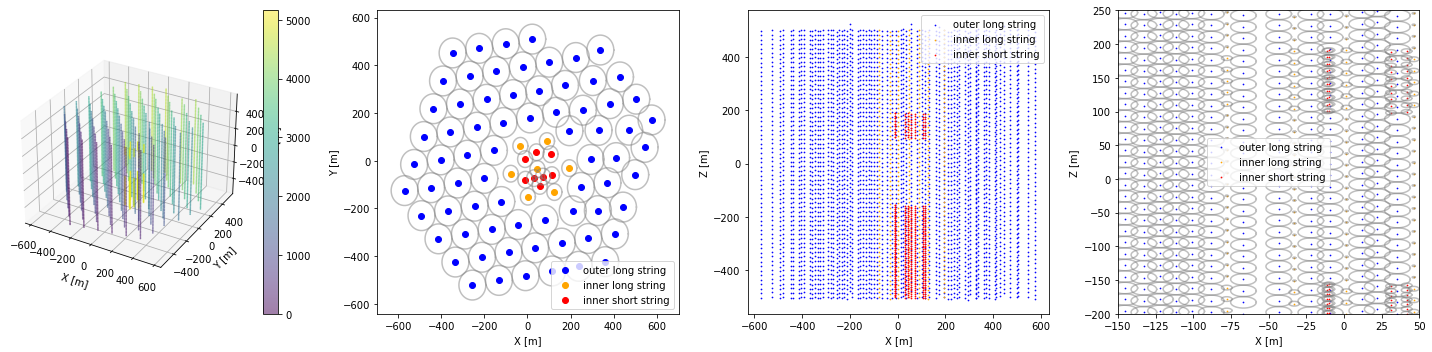

In [7]:
theta = np.linspace(0, 2 * np.pi, 361)

fig = plt.figure(figsize=(20, 5))

# 3D plot
ax = fig.add_subplot(141, projection='3d')

s = ax.scatter(sensor_x, sensor_y, sensor_z, s=0.5, c=np.arange(len(sensor_x)), alpha=0.5)

ax.set_xlabel("X [m]")
ax.set_ylabel("Y [m]")
ax.set_zlabel("Z [m]")

fig.colorbar(s, ax=ax)

# X-Y plot
ax = fig.add_subplot(142)

for string_id in outer_long_strings:
    x = sensor_x[string_id * doms_per_string]
    y = sensor_y[string_id * doms_per_string]
    r_err = sensor_r_err[string_id * doms_per_string]
    scatter_outer_long = ax.scatter(x, y, color="blue", label="outer long string")
    ax.plot(x + r_err * np.cos(theta), y + r_err * np.sin(theta), color="gray", alpha=0.5)
    
for string_id in inner_long_strings:
    x = sensor_x[string_id * doms_per_string]
    y = sensor_y[string_id * doms_per_string]
    r_err = sensor_r_err[string_id * doms_per_string]
    scatter_inner_long = ax.scatter(x, y, color="orange", label="inner long string")
    ax.plot(x + r_err * np.cos(theta), y + r_err * np.sin(theta), color="gray", alpha=0.5)
    
for string_id in inner_short_strings:
    x = sensor_x[string_id * doms_per_string]
    y = sensor_y[string_id * doms_per_string]
    r_err = sensor_r_err[string_id * doms_per_string]
    scatter_inner_short = ax.scatter(x, y, color="red", label="inner short string")
    ax.plot(x + r_err * np.cos(theta), y + r_err * np.sin(theta), color="gray", alpha=0.5)

ax.set_xlabel("X [m]")
ax.set_ylabel("Y [m]")
ax.legend(handles=[scatter_outer_long, scatter_inner_long, scatter_inner_short])

# X-Z plot
ax = fig.add_subplot(143)

for string_id in outer_long_strings:
    x = sensor_x[string_id * doms_per_string:string_id * doms_per_string + doms_per_string]
    z = sensor_z[string_id * doms_per_string:string_id * doms_per_string + doms_per_string]
    scatter_outer_long = ax.scatter(x, z, s=0.5, color="blue", label="outer long string")
    
for string_id in inner_long_strings:
    x = sensor_x[string_id * doms_per_string:string_id * doms_per_string + doms_per_string]
    z = sensor_z[string_id * doms_per_string:string_id * doms_per_string + doms_per_string]
    scatter_inner_long = ax.scatter(x, z, s=0.5, color="orange", label="inner long string")

for string_id in inner_short_strings:
    x = sensor_x[string_id * doms_per_string:string_id * doms_per_string + doms_per_string]
    z = sensor_z[string_id * doms_per_string:string_id * doms_per_string + doms_per_string]
    scatter_inner_short = ax.scatter(x, z, s=0.5, color="red", label="inner short string")

ax.set_xlabel("X [m]")
ax.set_ylabel("Z [m]")
ax.legend(handles=[scatter_outer_long, scatter_inner_long, scatter_inner_short])

# X-Z plot zoom
ax = fig.add_subplot(144)

for string_id in outer_long_strings:
    x = sensor_x[string_id * doms_per_string:string_id * doms_per_string + doms_per_string]
    z = sensor_z[string_id * doms_per_string:string_id * doms_per_string + doms_per_string]
    scatter_outer_long = ax.scatter(x, z, s=0.5, color="blue", label="outer long string")
    
for string_id in inner_long_strings:
    x = sensor_x[string_id * doms_per_string:string_id * doms_per_string + doms_per_string]
    z = sensor_z[string_id * doms_per_string:string_id * doms_per_string + doms_per_string]
    scatter_inner_long = ax.scatter(x, z, s=0.5, color="orange", label="inner long string")

for string_id in inner_short_strings:
    x = sensor_x[string_id * doms_per_string:string_id * doms_per_string + doms_per_string]
    z = sensor_z[string_id * doms_per_string:string_id * doms_per_string + doms_per_string]
    scatter_inner_short = ax.scatter(x, z, s=0.5, color="red", label="inner short string")

for sensor_id in range(doms_per_string * string_num):
    x = sensor_x[sensor_id]
    z = sensor_z[sensor_id]
    z_err = sensor_z_err[sensor_id]
    if (x > -150 and x < 50) and (z > -200 and z < 250):
        ax.plot(x + z_err * np.cos(theta), z + z_err * np.sin(theta), color="gray", alpha=0.5)

ax.set_xlabel("X [m]")
ax.set_ylabel("Z [m]")
ax.set_xlim(-150, 50)
ax.set_ylim(-200, 250)
ax.legend(handles=[scatter_outer_long, scatter_inner_long, scatter_inner_short])

fig.tight_layout()
plt.show()

In [8]:
# detector constants
c_const = 0.299792458  # speed of light [m/ns]

x_min = sensor_x.min()
x_max = sensor_x.max()
y_min = sensor_y.min()
y_max = sensor_y.max()
z_min = sensor_z.min()
z_max = sensor_z.max()

detector_length = np.sqrt((x_max - x_min)**2 + (y_max - y_min)**2 + (z_max - z_min)**2)
t_valid_length = detector_length / c_const

print("t_valid_length: ", t_valid_length, " ns")

t_valid_length:  6199.700247193777  ns


# Data I/O Helper

## Angle one-hot encoding edges

- It is efficient to train the model by classification task, initially.
- azimuth and zenith are independent
- azimuth distribution is flat and zenith distribution is sinusoidal.
  - Flat on the spherical surface
  - $\phi > \pi$ events are a little bit rarer than $\phi < \pi$ events, (maybe) because of the neutrino attenuation by earth.
- So, the uniform bin is used for azimuth, and $\left| \cos \right|$ bin is used for zenith

In [9]:
azimuth_edges = np.linspace(0, 2 * np.pi, bin_num + 1)
azimuth_shift = (azimuth_edges[1] - azimuth_edges[0]) / 2.

zenith_edges_flat = np.linspace(0, np.pi, bin_num + 1)
zenith_edges = list()
zenith_edges.append(0)
for bin_idx in range(1, bin_num):
    # cos(zen_before) - cos(zen_now) = 2 / bin_num
    zen_now = np.arccos(np.cos(zenith_edges[-1]) - 2 / (bin_num))
    zenith_edges.append(zen_now)
zenith_edges.append(np.pi)
zenith_edges = np.array(zenith_edges)

In [10]:
def y_to_onehot(batch_y):
    # evaluate bin code
    azimuth_code = (batch_y[:, 0] > azimuth_edges[1:].reshape((-1, 1))).sum(axis=0)
    zenith_code = (batch_y[:, 1] > zenith_edges[1:].reshape((-1, 1))).sum(axis=0)
    angle_code = bin_num * azimuth_code + zenith_code

    # one-hot
    batch_y_onehot = np.zeros((angle_code.size, bin_num * bin_num))
    batch_y_onehot[np.arange(angle_code.size), angle_code] = 1
    
    return batch_y_onehot

## Define a function converts from prediction to angles

- Calculation of the mean-vector in a bin $\theta \in ( \theta_0, \theta_1 )$ and $\phi \in ( \phi_0, \phi_1 )$
  - $\vec{r} \left( \theta, ~ \phi \right) = \left< \sin \theta \cos \phi, ~ \sin \theta \sin \phi, ~ \cos \theta \right>$
  - $\bar{\vec{r}} = \frac{ \int_{\theta_{0}}^{\theta_{1}} \int_{\phi_0}^{\phi_1} \vec{r} \left( \theta, ~ \phi \right) \sin \theta \,d\phi \,d\theta }{ \int_{\theta_{0}}^{\theta_{1}} \int_{\phi_0}^{\phi_1} 1 \sin \theta \,d\phi \,d\theta }$
  - $ \int_{\theta_{0}}^{\theta_{1}} \int_{\phi_0}^{\phi_1} 1 \sin \theta \,d\phi \,d\theta = \left( \phi_1 - \phi_0 \right) \left( \cos \theta_0 - \cos \theta_1 \right)$
  - $
\int_{\theta_{0}}^{\theta_{1}} \int_{\phi_0}^{\phi_1} {r}_{x} \left( \theta, ~ \phi \right) \sin \theta \,d\phi \,d\theta = 
\int_{\theta_{0}}^{\theta_{1}} \int_{\phi_0}^{\phi_1} \sin^2 \theta \cos \phi \,d\phi \,d\theta = 
\left( \sin \phi_1 - \sin \phi_0 \right) \left( \frac{\theta_1 - \theta_0}{2} - \frac{\sin 2 \theta_1 - \sin 2 \theta_0}{4} \right)
$
  - $
\int_{\theta_{0}}^{\theta_{1}} \int_{\phi_0}^{\phi_1} {r}_{y} \left( \theta, ~ \phi \right) \sin \theta \,d\phi \,d\theta = 
\int_{\theta_{0}}^{\theta_{1}} \int_{\phi_0}^{\phi_1} \sin^2 \theta \sin \phi \,d\phi \,d\theta = 
\left( \cos \phi_0 - \cos \phi_1 \right) \left( \frac{\theta_1 - \theta_0}{2} - \frac{\sin 2 \theta_1 - \sin 2 \theta_0}{4} \right)
$
  - $
\int_{\theta_{0}}^{\theta_{1}} \int_{\phi_0}^{\phi_1} {r}_{z} \left( \theta, ~ \phi \right) \sin \theta \,d\phi \,d\theta = 
\int_{\theta_{0}}^{\theta_{1}} \int_{\phi_0}^{\phi_1} \sin \theta \cos \theta \,d\phi \,d\theta = 
\left( \phi_1 - \phi_0 \right) \left( \frac{\cos 2 \theta_0 - \cos 2 \theta_1}{4} \right)
$

In [11]:
angle_bin_zenith0 = np.tile(zenith_edges[:-1], bin_num)
angle_bin_zenith1 = np.tile(zenith_edges[1:], bin_num)
angle_bin_azimuth0 = np.repeat(azimuth_edges[:-1], bin_num)
angle_bin_azimuth1 = np.repeat(azimuth_edges[1:], bin_num)

angle_bin_area = (angle_bin_azimuth1 - angle_bin_azimuth0) * (np.cos(angle_bin_zenith0) - np.cos(angle_bin_zenith1))
angle_bin_vector_sum_x = (np.sin(angle_bin_azimuth1) - np.sin(angle_bin_azimuth0)) * ((angle_bin_zenith1 - angle_bin_zenith0) / 2 - (np.sin(2 * angle_bin_zenith1) - np.sin(2 * angle_bin_zenith0)) / 4)
angle_bin_vector_sum_y = (np.cos(angle_bin_azimuth0) - np.cos(angle_bin_azimuth1)) * ((angle_bin_zenith1 - angle_bin_zenith0) / 2 - (np.sin(2 * angle_bin_zenith1) - np.sin(2 * angle_bin_zenith0)) / 4)
angle_bin_vector_sum_z = (angle_bin_azimuth1 - angle_bin_azimuth0) * ((np.cos(2 * angle_bin_zenith0) - np.cos(2 * angle_bin_zenith1)) / 4)

angle_bin_vector_mean_x = angle_bin_vector_sum_x / angle_bin_area
angle_bin_vector_mean_y = angle_bin_vector_sum_y / angle_bin_area
angle_bin_vector_mean_z = angle_bin_vector_sum_z / angle_bin_area

angle_bin_vector = np.zeros((1, bin_num * bin_num, 3))
angle_bin_vector[:, :, 0] = angle_bin_vector_mean_x
angle_bin_vector[:, :, 1] = angle_bin_vector_mean_y
angle_bin_vector[:, :, 2] = angle_bin_vector_mean_z

angle_bin_vector_unit = angle_bin_vector[0].copy()
angle_bin_vector_unit /= np.sqrt((angle_bin_vector_unit**2).sum(axis=1).reshape((-1, 1)))

In [12]:
def pred_to_angle(pred, epsilon=1e-8):
    # convert prediction to vector
    pred_vector = (pred.reshape((-1, bin_num * bin_num, 1)) * angle_bin_vector).sum(axis=1)
    
    # normalize
    pred_vector_norm = np.sqrt((pred_vector**2).sum(axis=1))
    mask = pred_vector_norm < epsilon
    pred_vector_norm[mask] = 1
    
    # assign <1, 0, 0> to very small vectors (badly predicted)
    pred_vector /= pred_vector_norm.reshape((-1, 1))
    pred_vector[mask] = np.array([1., 0., 0.])
    
    # convert to angle
    azimuth = np.arctan2(pred_vector[:, 1], pred_vector[:, 0])
    azimuth[azimuth < 0] += 2 * np.pi
    zenith = np.arccos(pred_vector[:, 2])
    
    # mask bad norm predictions as 0, 0
    azimuth[mask] = 0.
    zenith[mask] = 0.
    
    return azimuth, zenith


def pred_to_angle_azshift(pred, epsilon=1e-8):
    # convert prediction to vector
    pred_vector = (pred.reshape((-1, bin_num * bin_num, 1)) * angle_bin_vector).sum(axis=1)
    
    # normalize
    pred_vector_norm = np.sqrt((pred_vector**2).sum(axis=1))
    mask = pred_vector_norm < epsilon
    pred_vector_norm[mask] = 1
    
    # assign <1, 0, 0> to very small vectors (badly predicted)
    pred_vector /= pred_vector_norm.reshape((-1, 1))
    pred_vector[mask] = np.array([1., 0., 0.])
    
    # convert to angle
    azimuth = np.arctan2(pred_vector[:, 1], pred_vector[:, 0])
    azimuth[azimuth < 0] += 2 * np.pi
    zenith = np.arccos(pred_vector[:, 2])
    
    # shift
    azimuth -= azimuth_shift
    azimuth[azimuth < 0] += 2 * np.pi
    
    # mask bad norm predictions as 0, 0
    azimuth[mask] = 0.
    zenith[mask] = 0.
    
    return azimuth, zenith

In [13]:
def pred_to_angle_argmax(pred):
    # get the highest score codes
    pred_code = pred.argmax(axis=1)
    
    # get the bin vector
    pred_vector = angle_bin_vector_unit[pred_code, :]
    
    # convert to angle
    azimuth = np.arctan2(pred_vector[:, 1], pred_vector[:, 0])
    azimuth[azimuth < 0] += 2 * np.pi
    zenith = np.arccos(pred_vector[:, 2])
    
    return azimuth, zenith

## Weighted-Vector Ensemble

In [14]:
def weighted_vector_ensemble(angles, weight):
    # Convert angle to vector
    vec_models = list()
    for angle in angles:
        az, zen = angle

        sa = np.sin(az)
        ca = np.cos(az)
        sz = np.sin(zen)
        cz = np.cos(zen)

        vec = np.stack([sz * ca, sz * sa, cz], axis=1)
        vec_models.append(vec)
    vec_models = np.array(vec_models)

    # Weighted-mean
    vec_mean = (weight.reshape((-1, 1, 1)) * vec_models).sum(axis=0) / weight.sum()
    vec_mean /= np.sqrt((vec_mean**2).sum(axis=1)).reshape((-1, 1))

    # Convert vector to angle
    zenith = np.arccos(vec_mean[:, 2])
    azimuth = np.arctan2(vec_mean[:, 1], vec_mean[:, 0])
    azimuth[azimuth < 0] += 2 * np.pi
    
    return azimuth, zenith

## Single event reader function

- Pick-up important data points first
    - Rank 3 (First)
        - not aux, in valid time window
    - Rank 2
        - not aux, out of valid time window
    - Rank 1
        - aux, in valid time window
    - Rank 0 (Last)
        - aux, out of valid time window
    - In each ranks, take pulses from highest charge

In [15]:
open_batch_dict = dict()


# read single event from batch_meta_df
def read_event(event_idx, batch_meta_df, max_pulse_count, train=True):
    # read metadata
    batch_id, first_pulse_index, last_pulse_index = batch_meta_df.iloc[event_idx][["batch_id", "first_pulse_index", "last_pulse_index"]].astype("int")

    # close past batch df
    if batch_id - 1 in open_batch_dict.keys():
        del open_batch_dict[batch_id - 1]

    # open current batch df
    if batch_id not in open_batch_dict.keys():
        if train:
            open_batch_dict.update({batch_id: pd.read_parquet(train_format.format(batch_id=batch_id))})
        else:
            open_batch_dict.update({batch_id: pd.read_parquet(test_format.format(batch_id=batch_id))})
    
    batch_df = open_batch_dict[batch_id]
    
    # read event
    event_feature = batch_df[first_pulse_index:last_pulse_index + 1]
    sensor_id = event_feature.sensor_id
    
    # merge features into single structured array
    dtype = [
        ("time", "float16"),
        ("charge", "float16"),
        ("auxiliary", "float16"),
        ("x", "float16"),
        ("y", "float16"),
        ("z", "float16"),
        ("r_err", "float16"),
        ("z_err", "float16"),
        ("rank", "short"),
    ]
    event_x = np.zeros(last_pulse_index - first_pulse_index + 1, dtype)

    event_x["time"] = event_feature.time.values - event_feature.time.min()
    event_x["charge"] = event_feature.charge.values
    event_x["auxiliary"] = event_feature.auxiliary.values

    event_x["x"] = sensor_geometry_df.x[sensor_id].values
    event_x["y"] = sensor_geometry_df.y[sensor_id].values
    event_x["z"] = sensor_geometry_df.z[sensor_id].values

    event_x["r_err"] = sensor_geometry_df.r_err[sensor_id].values
    event_x["z_err"] = sensor_geometry_df.z_err[sensor_id].values
    
    # For long event, pick-up
    if len(event_x) > max_pulse_count:
        # Find valid time window
        t_peak = event_x["time"][event_x["charge"].argmax()]
        t_valid_min = t_peak - t_valid_length
        t_valid_max = t_peak + t_valid_length

        t_valid = (event_x["time"] > t_valid_min) * (event_x["time"] < t_valid_max)

        # rank
        event_x["rank"] = 2 * (1 - event_x["auxiliary"]) + (t_valid)

        # sort by rank and charge (important goes to backward)
        event_x = np.sort(event_x, order=["rank", "charge"])

        # pick-up from backward
        event_x = event_x[-max_pulse_count:]

        # resort by time
        event_x = np.sort(event_x, order="time")

    # for train data, give angles together
    if train:
        azimuth, zenith = batch_meta_df.iloc[event_idx][["azimuth", "zenith"]].astype("float16")
        event_y = np.array([azimuth, zenith], dtype="float16")
        
        return event_idx, len(event_x), event_x, event_y
    
    # for test data, just give feature 
    else:
        return event_idx, len(event_x), event_x

# Data I/O (for CPU) & Normalization

- Read data
- Concatenate and convert
- Normalize time, charge and position variables

## Read test metadata and define spliter (for CPU)

In [16]:
test_meta_df = pq.read_table(home_dir + 'test_meta.parquet').to_pandas()
test_meta_df.head()

,batch_id,event_id,first_pulse_index,last_pulse_index
0,661,2092,0,298
1,661,7344,299,334
2,661,9482,335,377


In [17]:
batch_counts = test_meta_df.batch_id.value_counts().sort_index()

batch_max_index = batch_counts.cumsum()
batch_max_index[test_meta_df.batch_id.min() - 1] = 0
batch_max_index = batch_max_index.sort_index()


def test_meta_df_spliter(batch_id):
    return test_meta_df.loc[batch_max_index[batch_id - 1]:batch_max_index[batch_id] - 1]

## Read test data and predict batch-by-batch

In [18]:
test_batch_ids = test_meta_df.batch_id.unique()

test_event_id = list()
test_azimuth = list()
test_zenith = list()

for batch_id in test_batch_ids:
    print(batch_id)
    # READ ONE BATCH OF TEST DATA
    # get batch meta data
    batch_meta_df = test_meta_df_spliter(batch_id)

    # register pulses
    test_x = np.zeros((len(batch_meta_df), max_pulse_count, n_features), dtype="float16")    
    test_x[:, :, 2] = -1
    

    def read_event_local(event_idx):
        return read_event(event_idx, batch_meta_df, max_pulse_count, train=False)

    
    # scan events
    iterator = range(len(batch_meta_df))
    with multiprocessing.Pool() as pool:
        for event_idx, pulse_count, event_x in pool.map(read_event_local, iterator):
            # feature
            test_x[event_idx, :pulse_count, 0] = event_x["time"]
            test_x[event_idx, :pulse_count, 1] = event_x["charge"]
            test_x[event_idx, :pulse_count, 2] = event_x["auxiliary"]
            test_x[event_idx, :pulse_count, 3] = event_x["x"]
            test_x[event_idx, :pulse_count, 4] = event_x["y"]
            test_x[event_idx, :pulse_count, 5] = event_x["z"]
            test_x[event_idx, :pulse_count, 6] = event_x["r_err"]
            test_x[event_idx, :pulse_count, 7] = event_x["z_err"]
    
    del batch_meta_df
    
    # CONVERT
    test_x[:, :, 0] /= 1000  # time
    test_x[:, :, 1] /= 300  # charge
    test_x[:, :, 3:] /= 600  # space
    
    # PREDICT
    pred_angles = list()
    for model, shifted in zip(models, model_shifted):
        pred_model = model.predict(test_x, verbose=0)
        
        if shifted:
            az_model, zen_model = pred_to_angle_azshift(pred_model)
        else:
            az_model, zen_model = pred_to_angle(pred_model)
    
        pred_angles.append((az_model, zen_model))
    
    pred_azimuth, pred_zenith = weighted_vector_ensemble(pred_angles, weights)
    
    event_ids = test_meta_df.event_id[test_meta_df.batch_id == batch_id].values
    
    for event_id, azimuth, zenith in zip(event_ids, pred_azimuth, pred_zenith):
        if np.isfinite(azimuth) and np.isfinite(zenith):
            test_event_id.append(int(event_id))
            test_azimuth.append(azimuth)
            test_zenith.append(zenith)
        else:
            test_event_id.append(int(event_id))
            test_azimuth.append(0.)
            test_zenith.append(0.)

661


2023-02-03 02:59:46.350614: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


## Submit

In [19]:
test_result_dict = {
    "event_id": test_event_id,
    "azimuth": test_azimuth,
    "zenith": test_zenith,
}

test_result_df = pd.DataFrame(test_result_dict)
test_result_df = test_result_df.sort_values(by=['event_id'])

test_result_df.to_csv("submission.csv", index=False)
test_result_df.head()

,event_id,azimuth,zenith
0,2092,1.163889,0.199999
1,7344,4.172546,1.798493
2,9482,4.367504,1.565106


# END-OF-NOTE